In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step


In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train.shape

(60000, 28, 28)

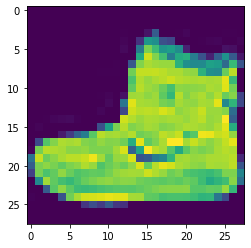

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train.max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_train = x_train.reshape(60000,28,28,1)

In [12]:
x_test = x_test.reshape(10000,28,28,1)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_test = to_categorical(y_test,10)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

In [22]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.4063 - accuracy: 0.8555 - val_loss: 0.3210 - val_accuracy: 0.8825
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2782 - accuracy: 0.8982 - val_loss: 0.2968 - val_accuracy: 0.8904
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2358 - accuracy: 0.9121 - val_loss: 0.2688 - val_accuracy: 0.9025
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2011 - accuracy: 0.9246 - val_loss: 0.2473 - val_accuracy: 0.9079
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1720 - accuracy: 0.9360 - val_loss: 0.2621 - val_accuracy: 0.9090
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1506 - accuracy: 0.9434 - val_loss: 0.2527 - val_accuracy: 0.9168
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1302 - accuracy: 0.9506 - val_loss: 0.2647 -

In [23]:
model.metrics_names

['loss', 'accuracy']

In [25]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

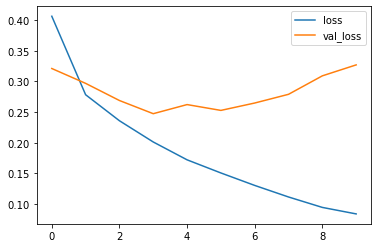

In [26]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

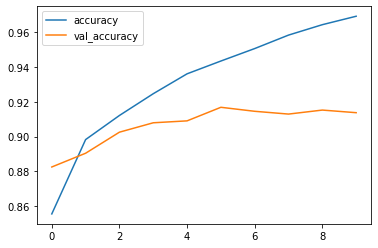

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.90      0.86      1000
           3       0.93      0.91      0.92      1000
           4       0.83      0.88      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.78      0.73      0.76      1000
           7       0.94      0.99      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

